In [1]:
import pandas as pd
from pyarrow import csv
import numpy as np
import networkx as nx
from functools import reduce
#import sweetviz as sv
import matplotlib.pyplot as plt

import timeit
import time

In [2]:
trainData_file=csv.read_csv('Data/trainData_final_nolinks_50k_day02.csv')
training_df2 =  trainData_file.to_pandas()
training_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp002915,0.001429,0.012001,2.017466,220248,5555.800000,Missing,8,2888,3.0,2972.0,1.0,991.333333,288.0,96.0,160.000000,0.0,0.0,0.0
1,ActiveDirectory,Comp003448,0.001048,0.002411,1.264516,167808,5552.600000,Missing,4,2888,7.0,2971.0,0.0,717.000000,288.0,96.0,137.142857,0.0,0.0,0.0
2,ActiveDirectory,Comp005774,0.001144,0.002185,1.368704,167808,5553.400000,Missing,3,2888,1.0,1202.0,1202.0,1202.000000,138.0,138.0,138.000000,0.0,0.0,0.0
3,ActiveDirectory,Comp006160,0.002000,0.142927,3.233054,367080,5560.600000,Missing,8,2888,2.0,1.0,0.0,0.500000,618.0,96.0,357.000000,0.0,0.0,0.0
4,ActiveDirectory,Comp007324,0.001334,0.004589,1.644425,230736,5555.000000,Missing,1,2888,4.0,3455.0,1.0,1402.000000,384.0,96.0,264.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546394,Comp378365,Comp485524,0.166667,0.000380,0.333844,110,2774.300000,NoLink,0,11,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
546395,Comp928022,Comp270144,0.236842,0.001057,0.992423,462,2779.100000,NoLink,4,33,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
546396,Comp940027,Comp814131,0.000000,0.000000,0.000000,0,0.000000,NoLink,0,32,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
546397,Comp203056,Comp644901,0.000000,0.000000,0.000000,36,1847.933333,NoLink,2,18,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
testData_file=csv.read_csv('Data/testData_final_nolinks__50k_day02.csv')
testing_df2 =  testData_file.to_pandas()
testing_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp000566,0.001477,0.258959,3.130220,227325,5683.800000,Missing,6,3602,1.0,86.0,86.0,86.000000,0.0,0.0,0.0,2327.0,2327.0,2327.0
1,ActiveDirectory,Comp002524,0.002213,0.008351,2.922840,465475,5690.200000,Missing,10,3602,6.0,4096.0,1.0,1400.666667,480.0,96.0,240.0,0.0,0.0,0.0
2,ActiveDirectory,Comp002907,0.001293,0.009648,1.742483,184025,5682.200000,Missing,2,3602,7.0,2070.0,1.0,296.571429,138.0,96.0,102.0,0.0,0.0,0.0
3,ActiveDirectory,Comp003489,0.001567,0.009273,2.117700,465475,5684.600000,Missing,6,3602,6.0,1.0,0.0,0.333333,96.0,96.0,96.0,0.0,0.0,0.0
4,ActiveDirectory,Comp005115,0.002030,0.007595,2.633240,368050,5688.600000,Missing,1,3602,1.0,0.0,0.0,0.000000,46.0,46.0,46.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554445,Comp235897,Comp505193,0.000000,0.000000,0.000000,154,1890.333333,NoLink,11,14,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
554446,Comp804839,Comp363110,0.285714,0.001697,1.346786,680,2845.100000,NoLink,3,20,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
554447,Comp079329,Comp257079,0.200000,0.000792,0.140047,9,2836.300000,NoLink,1,2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
554448,Comp838114,Comp937614,0.000000,0.000000,0.000000,0,0.000000,NoLink,0,10,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_test, y_test = testing_df2[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment',  'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], testing_df2['Label']

model = RandomForestClassifier()
#model.fit(X_train, y_train)

#print(f"Accuracy on the test set: {accuracy_score(y_test, model.predict(X_test))}")

In [5]:
len(training_df2[training_df2["Label"]=="Continuing"])


270005

In [6]:
len(training_df2[training_df2["Label"]=="Missing"])


95542

In [7]:
len(training_df2[training_df2["Label"]=="New"])

130870

In [8]:
len(training_df2[training_df2["Label"]=="NoLink"])

49982

In [ ]:
len(testing_df2[testing_df2["Label"]=="Continuing"])

In [ ]:
len(testing_df2[testing_df2["Label"]=="Missing"])

In [ ]:
len(testing_df2[testing_df2["Label"]=="New"])

In [ ]:
TrainTest=[]
TrainTest.append(training_df2)
TrainTest.append(testing_df2)

In [10]:
trainData=training_df2.copy()

In [11]:
train_Cont_df=trainData[trainData["Label"]=="Continuing"]
train_Miss_df=trainData[trainData["Label"]=="Missing"]
train_New_df=trainData[trainData["Label"]=="New"]
train_NoLink_df=trainData[trainData["Label"]=="NoLink"]

In [12]:
# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLink']
#report_2 = classification_report(y_test, pred, target_names=target_names)
#print(f"Test Score\t {pred}")
#print(report_2)

In [13]:
dfc=train_Cont_df.sample(n = 49000)
dfm=train_Miss_df.sample(n = 49000)
dfn=train_New_df.sample(n = 49000)
dfnl=train_NoLink_df.sample(n = 49000)

In [14]:
trainData_df3=pd.concat([dfc,dfm,dfn,dfnl],ignore_index=True)
X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']
model.fit(X_train_3, y_train_3)
pred = model.predict(X_test)
Accuracy_score=accuracy_score(y_test, pred)

print(f"Accuracy on the test set: {Accuracy_score}")

Accuracy on the test set: 0.8220560916223284


In [15]:
# Step 5 Performance Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix
#print("Sample size for Computer Work   =",(X['Activity']==2).sum())

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)

print('Confusion Matrix: \n', cm)

Confusion Matrix: 
 [[245303  53197      0      0]
 [ 34450  67925      0      0]
 [     0      0  94991   8609]
 [     0      0   2405  47570]]


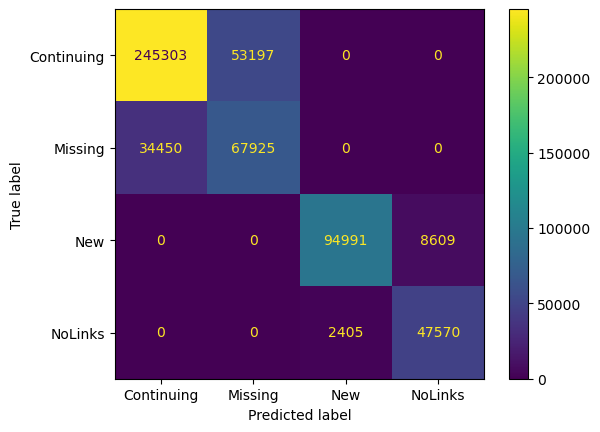

In [16]:
#step 5 Performance Evaluation: Confusion Matrix Visualization
import matplotlib.pyplot as plt

class_names=['Continuing','Missing','New','NoLinks']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format="d")
#disp.plot()
plt.show()

In [17]:
# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLinks']
report_2 = classification_report(y_test, pred, target_names=target_names)
#print(f"Test Score\t {pred}")
print(report_2)

              precision    recall  f1-score   support

  Continuing       0.88      0.82      0.85    298500
     Missing       0.56      0.66      0.61    102375
         New       0.98      0.92      0.95    103600
     NoLinks       0.85      0.95      0.90     49975

    accuracy                           0.82    554450
   macro avg       0.81      0.84      0.82    554450
weighted avg       0.83      0.82      0.83    554450



In [19]:
# create a for loop for performing the sample 5 times and aggregate the results
Accuracy_List=[]

for i in range(5):
    
    dfc=train_Cont_df.sample(n = 49000)
    dfm=train_Miss_df.sample(n = 49000)
    dfn=train_New_df.sample(n = 49000)
    dfnl=train_NoLink_df.sample(n = 49000)
    
    trainData_df3=pd.concat([dfc,dfm,dfn,dfnl],ignore_index=True)
    X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']
    model.fit(X_train_3, y_train_3)
    pred = model.predict(X_test)
    Accuracy_score=accuracy_score(y_test, pred)
    Accuracy_List.append(Accuracy_score)
    print(f"Accuracy on the test set:{i+1} {Accuracy_score}")
    
    report_2 = classification_report(y_test, pred, target_names=target_names)
    print(f"report{i+1}")
    print(report_2)
    
Avg_Accuracy= np.mean(Accuracy_List)
print(f"Average_Accuracy: {Avg_Accuracy}")


Accuracy on the test set:1 0.825107764451258
report1
              precision    recall  f1-score   support

  Continuing       0.88      0.83      0.85    298500
     Missing       0.57      0.66      0.61    102375
         New       0.97      0.92      0.95    103600
     NoLinks       0.85      0.95      0.90     49975

    accuracy                           0.83    554450
   macro avg       0.82      0.84      0.83    554450
weighted avg       0.84      0.83      0.83    554450

Accuracy on the test set:2 0.8220813418703219
report2
              precision    recall  f1-score   support

  Continuing       0.87      0.83      0.85    298500
     Missing       0.56      0.65      0.60    102375
         New       0.97      0.92      0.95    103600
     NoLinks       0.85      0.95      0.90     49975

    accuracy                           0.82    554450
   macro avg       0.81      0.84      0.82    554450
weighted avg       0.83      0.82      0.83    554450

Accuracy on the test se

In [ ]:
# create a for loop for performing the sample 5 times and aggregate the results
Accuracy_List=[]

for i in range(5):
    
    dfc=train_Cont_df.sample(n = 50000)
    dfm=train_Miss_df.sample(n = 50000)
    dfn=train_New_df.sample(n = 50000)
    
    trainData_df3=pd.concat([dfc,dfm,dfn],ignore_index=True)
    X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']
    model.fit(X_train_3, y_train_3)
    pred = model.predict(X_test)
    Accuracy_score=accuracy_score(y_test, pred)
    Accuracy_List.append(Accuracy_score)
    print(f"Accuracy on the test set:{i+1} {Accuracy_score}")
    
    report_2 = classification_report(y_test, pred, target_names=target_names)
    print(f"report{i+1}")
    print(report_2)
    
Avg_Accuracy= np.mean(Accuracy_List)
print(f"Average_Accuracy: {Avg_Accuracy}")

In [ ]:
# create a for loop for performing the sample 5 times and aggregate the results
Accuracy_List=[]

for i in range(5):
    
    dfc=train_Cont_df.sample(n = 15000)
    dfm=train_Miss_df.sample(n = 15000)
    dfn=train_New_df.sample(n = 15000)
    
    trainData_df3=pd.concat([dfc,dfm,dfn],ignore_index=True)
    X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']
    model.fit(X_train_3, y_train_3)
    pred = model.predict(X_test)
    Accuracy_score=accuracy_score(y_test, pred)
    Accuracy_List.append(Accuracy_score)
    print(f"Accuracy on the test set:{i+1} {Accuracy_score}")
    
    report_2 = classification_report(y_test, pred, target_names=target_names)
    print(f"report{i+1}")
    print(report_2)
    
Avg_Accuracy= np.mean(Accuracy_List)
print(f"Average_Accuracy: {Avg_Accuracy}")

In [ ]:
# create a for loop for performing the sample 5 times and aggregate the results
for i in range(5):
    dfc=train_Cont_df.sample(n = 30000)
    dfm=train_Miss_df.sample(n = 30000)
    dfn=train_New_df.sample(n = 30000)
    trainData_df3=pd.concat([dfc,dfm,dfn],ignore_index=True)
    X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']
    model.fit(X_train_3, y_train_3)
    print(f"Accuracy on the test set:{i} {accuracy_score(y_test, model.predict(X_test))}")
    

In [ ]:
# create a for loop for performing the sample 5 times and aggregate the results
for i in range(5):
    dfc=train_Cont_df.sample(n = 15000)
    dfm=train_Miss_df.sample(n = 15000)
    dfn=train_New_df.sample(n = 15000)
    trainData_df3=pd.concat([dfc,dfm,dfn],ignore_index=True)
    X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']
    model.fit(X_train_3, y_train_3)
    print(f"Accuracy on the test set:{i} {accuracy_score(y_test, model.predict(X_test))}")
    